In [1]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\deeda\Desktop\Brandeis\Second Year\Lab rotation\voice_dataset.csv'
voice_dataset = pd.read_csv(file_path)


# Check the first few rows of the dataset to understand its structure
voice_dataset.head()


,Particpant ID,group,Pitch,Jitter,Shimmer,H2N
0,ID101,1,206.828,2.390,16.893,8.773
1,ID102,1,124.722,2.681,18.274,6.492
2,ID103,1,126.749,2.517,15.858,8.411
3,ID108,1,260.824,2.310,14.368,9.841
4,ID109,1,112.587,2.927,17.487,6.683


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
# Selecting the relevant features for clustering
X = voice_dataset[['Shimmer', 'H2N']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=120)  # Assume 3 clusters for initial analysis
kmeans.fit(X_scaled)

# Add cluster labels to the original dataset
voice_dataset['Cluster'] = kmeans.labels_

In [5]:
# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
#plt.scatter(X_pca[:, 0], X_pca[:, 1], c=voice_dataset['Cluster'], cmap='viridis', marker='o')
#plt.title('Voice Metrics Clustering (K-Means)')
#plt.xlabel('PCA Component 1')
#plt.ylabel('PCA Component 2')
#plt.colorbar(label='Cluster')
#
plt.show()

In [47]:
# Displaying the dataset with the cluster assignments
#import ace_tools as tools; tools.display_dataframe_to_user(name="Voice Metrics Clustered Data", dataframe=voice_data)

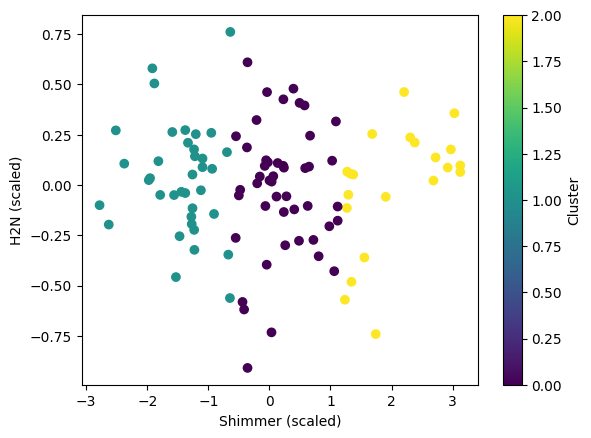

In [6]:
# Visualize the clusters using the two selected features
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=voice_dataset['Cluster'], cmap='viridis', marker='o')
plt.title('')
plt.xlabel('Shimmer (scaled)')
plt.ylabel('H2N (scaled)')
plt.colorbar(label='Cluster')
#plt.show()
plt.savefig(r'C:\Users\deeda\Desktop\Brandeis\Second Year\Lab rotation/cluster_pca_plot_shimmer&H2N.png')

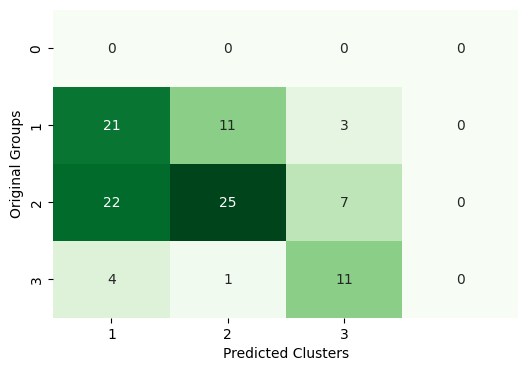

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix to compare the new clusters and the original groups
conf_matrix_3_clusters = confusion_matrix(voice_dataset['group'], voice_dataset['Cluster'])

# Plot the confusion matrix
#plt.figure(figsize=(6, 4))
#sns.heatmap(conf_matrix_3_clusters, annot=True, fmt='d', cmap='Blues', cbar=False)
#plt.title('Confusion Matrix: Original Groups vs Clusters')
#plt.xlabel('Predicted Clusters ()')
#plt.ylabel('Original Groups')
#plt.show()

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_3_clusters, annot=True, fmt='d', cmap='Greens', cbar=False, xticklabels=[1, 2, 3])
plt.title('')
plt.xlabel('Predicted Clusters')
plt.ylabel('Original Groups')
#plt.show()
plt.savefig(r'C:\Users\deeda\Desktop\Brandeis\Second Year\Lab rotation/confusion_matrix_shimmer&H2N.png')

In [8]:
# Adjust cluster labels in the dataset to be 1, 2, and 3 instead of 0, 1, and 2
voice_dataset['Cluster'] = voice_dataset['Cluster'] + 1

cluster_group_composition = pd.crosstab(voice_dataset['Cluster'], voice_dataset['group'], normalize='index') * 100
cluster_group_composition = cluster_group_composition.round(2)

# Get summary statistics for each cluster based on voice metrics
#cluster_summary = voice_dataset.groupby('Cluster')[['Shimmer', 'H2N']].mean().round(2)

# Display the composition of each cluster in relation to the original groups
display(cluster_group_composition)

# Display the summary statistics for each cluster
#display(cluster_summary)

group,1,2,3
Cluster,,,
1,44.68,46.81,8.51
2,29.73,67.57,2.70
3,14.29,33.33,52.38


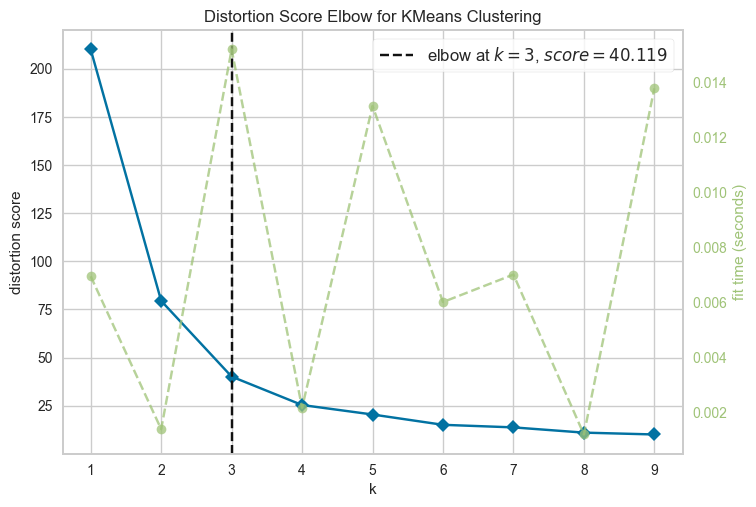

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
#install yellowbrick to vizualize the Elbow curve
#!pip install yellowbrick  

#from sklearn import datasets
#from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(1,10))
 
visualizer.fit(X_pca)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
#use silhoutte method to validate the number of clusters?

In [19]:
#!pip install plotly
import plotly.graph_objects as go  #for 3D plot

# Reduce dimensions using PCA for visualization
#pca = PCA(n_components=3) #use this if the features are 3
#X_pca3 = pca.fit_transform(X_scaled)


## K-means using k = 3
#kmeans = KMeans(n_clusters=3)
#kmeans.fit(X_pca3)
#y_kmeans = kmeans.predict(X_pca3)


In [ ]:
## 3D plot 

#labels = kmeans.labels_
#trace = go.Scatter3d(x=X_pca3[:, 0], y=X_pca3[:, 1], z=X_pca3[:, 2], c=labels, cmap='viridis', s=50)))
#layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
#data = [trace]
#fig = go.Figure(data = data) #layout = layout)
#fig.show()